# INFO 6146 Tensor Flow & Keras



**Problem Statement:**

The Fashion Design dataset (Fashion Design - MNIST) is akin to MNIST but encompasses images of specific clothing items and accessories.  

This project aims to categorize these images into distinct classes using three different approaches:  

* a single-layer Artificial Neural Network (Maher)

* double-layered Artificial Neural Network (Usman)

* a traditional supervised machine learning algorithm.(Jack, Mohamed)



**Dataset Description:**

Fashion-MNIST is a dataset of Zalando's article images:

* Total images: 70,000

* Training set: 60,000

* Test set: 10,000

* Image size (grayscale): 28x28 pixels

* Pixel intensity range: 0-255 (normalize)

* Classes (10): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle-boot

**Tasks to be Completed:**

Create a document to answer these questions – 0 – No attempt; 1 – Attempt, 2 – with 50% correctness, 3 - Completed

Marks: 30

1. How does the accuracy of classification compare among the single-layer Artificial Neural Network, double-layers Artificial Neural Network, and the traditional supervised machine learning algorithm for the MNIST fashion dataset?

2. What are the differences in terms of training time between the three approaches when classifying the MNIST fashion images?

4. How do the three methods perform in terms of generalization to unseen data? Do any of them show signs of overfitting or underfitting?

5. Can you analyze and compare the learning curves of the three approaches? How does the loss and accuracy change over epochs for each method?

6. Are there notable differences in the model's performance when dealing with certain classes of fashion items? Do specific approaches excel in classifying certain types of items?

7. How sensitive are the three methods to hyperparameter tuning? Are there certain parameters that drastically affect their performance on the MNIST fashion dataset?

8. What are the limitations of each approach in terms of handling the complexity and nuances of fashion images compared to more advanced techniques?

9. How do the single-layer and double-layered Artificial Neural Networks compare in terms of the depth of features they can extract from the images?

10. Can you analyze the decision boundaries created by each approach? Do they handle complex decision boundaries in the dataset differently?

What insights can you draw about the trade-offs between computational complexity, model performance, and ease of implementation when comparing these three approaches?

Marks 20

Create a detailed Python notebook for each method (a total of 3 files) and share your implemented Python codes with comments in each step of the procedure.



In [42]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Downloading data and normalizing

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
  classes = {
    0:	'T-shirt/top',
    1:	'Trouser',
    2:	'Pullover',
    3:	'Dress',
    4:	'Coat',
    5:	'Sandal',
    6:	'Shirt',
    7:	'Sneaker',
    8:	'Bag',
    9:	'Ankle boot',
    }

# Visualizing data

In [3]:
def plot_images(num, images, vs_pred:bool, predictions):
  import math
  classes = {
    0:	'T-shirt/top',
    1:	'Trouser',
    2:	'Pullover',
    3:	'Dress',
    4:	'Coat',
    5:	'Sandal',
    6:	'Shirt',
    7:	'Sneaker',
    8:	'Bag',
    9:	'Ankle boot',
    }

  fig = plt.figure(figsize=(10,min(10,5*math.ceil(num/5))))

  for i in range(num):
    #ax = fig.add_subplot(2, 2, i + 1)


    ax = plt.subplot(math.ceil(num/5),5,i+1)
    plt.tight_layout()
    plt.imshow(test_images[i], cmap='gray', interpolation='none')
    if vs_pred:
      plt.title("actual: {}\n prediction: {}".format(classes[test_labels[i]],classes[predictions[i]]), {'color': 'red' if classes[test_labels[i]] != classes[predictions[i]] else 'black'})
      if classes[test_labels[i]] != classes[predictions[i]]:
        for spine in ax.spines.values():
          spine.set_edgecolor('red')
          spine.set_linewidth(5)
    else:
      plt.title("actual: {}".format(classes[test_labels[i]]))
    plt.xticks([])
    plt.yticks([])
  plt.show()

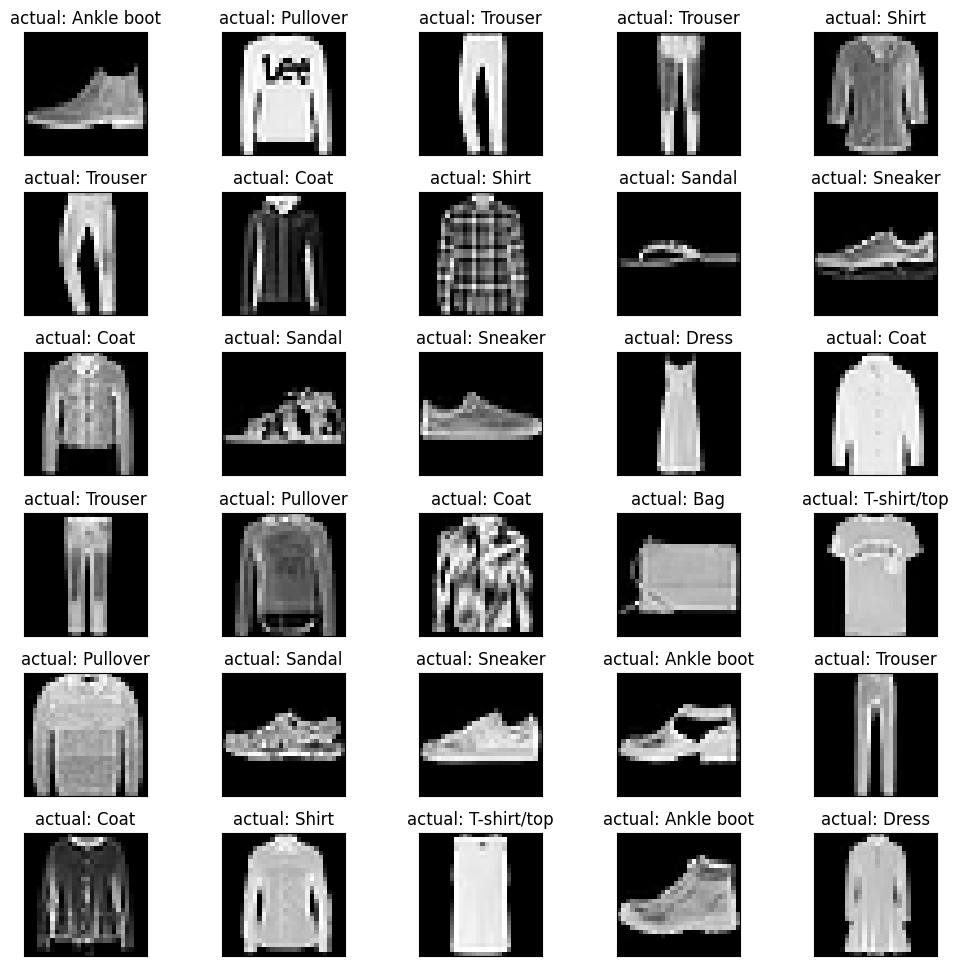

In [4]:
plot_images(30,test_images[:30],False,[])

In [5]:
flattened_train_images = tf.reshape(train_images, (60000,28*28))
flattened_test_images = tf.reshape(test_images, (10000,28*28))
print('new train images shape: {}'.format(flattened_train_images.shape))
print('new test images shape: {}'.format(flattened_test_images.shape))

new train images shape: (60000, 784)
new test images shape: (10000, 784)


In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(flattened_train_images, train_labels.ravel())

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min


RandomForestClassifier(random_state=42, verbose=True)

In [27]:
y_pred = rf_model.predict(flattened_test_images)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


In [28]:
accuracy = accuracy_score(test_labels, y_pred=y_pred)
print("Random Forest accuracy: {:.2f}".format(accuracy))

Random Forest accuracy: 0.88


# Visualizing one tree in the random forest

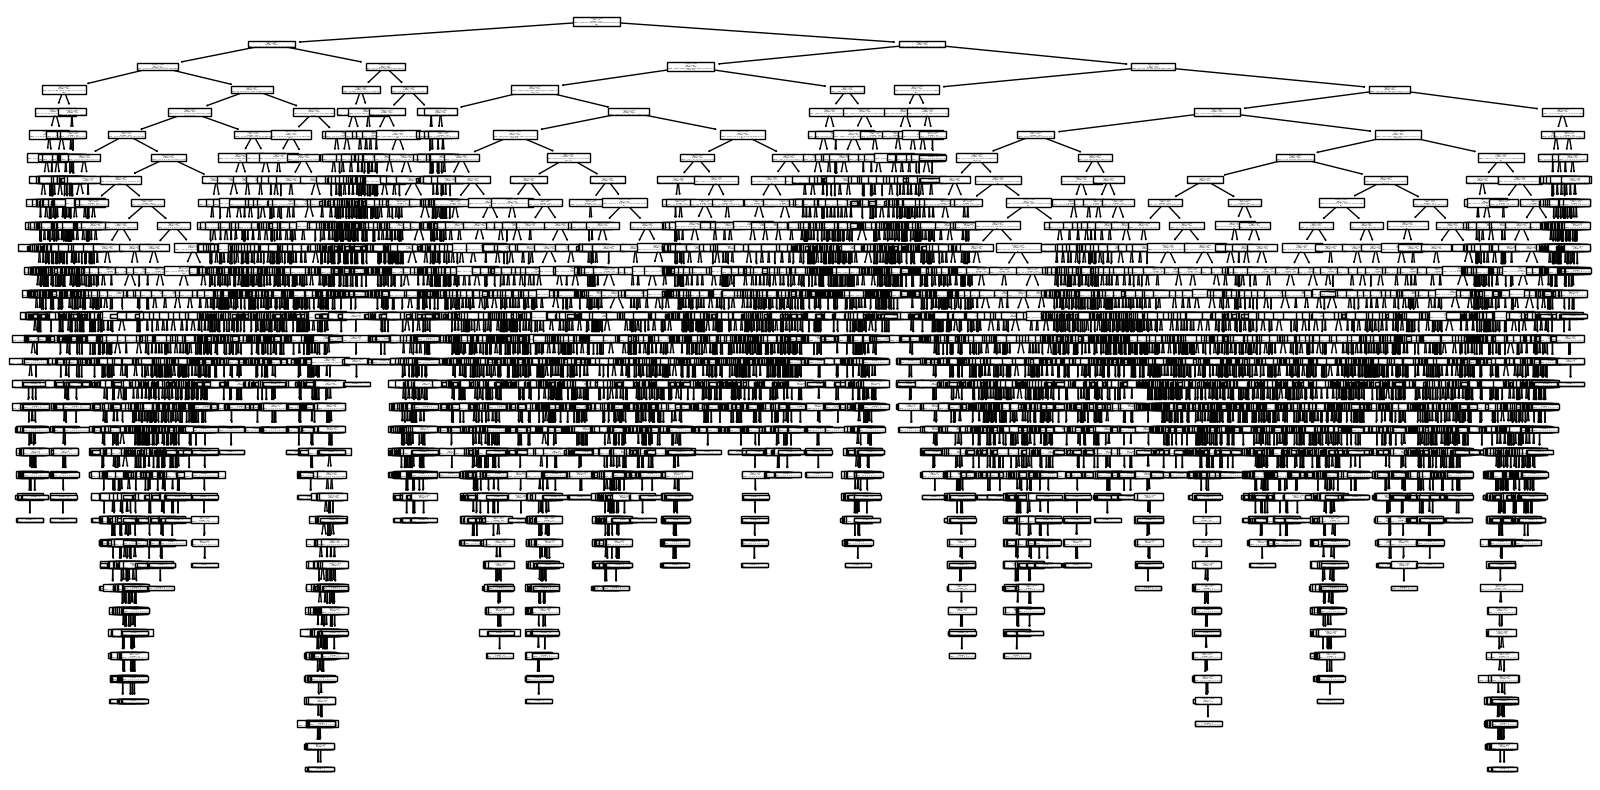

In [29]:
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0])
plt.show()

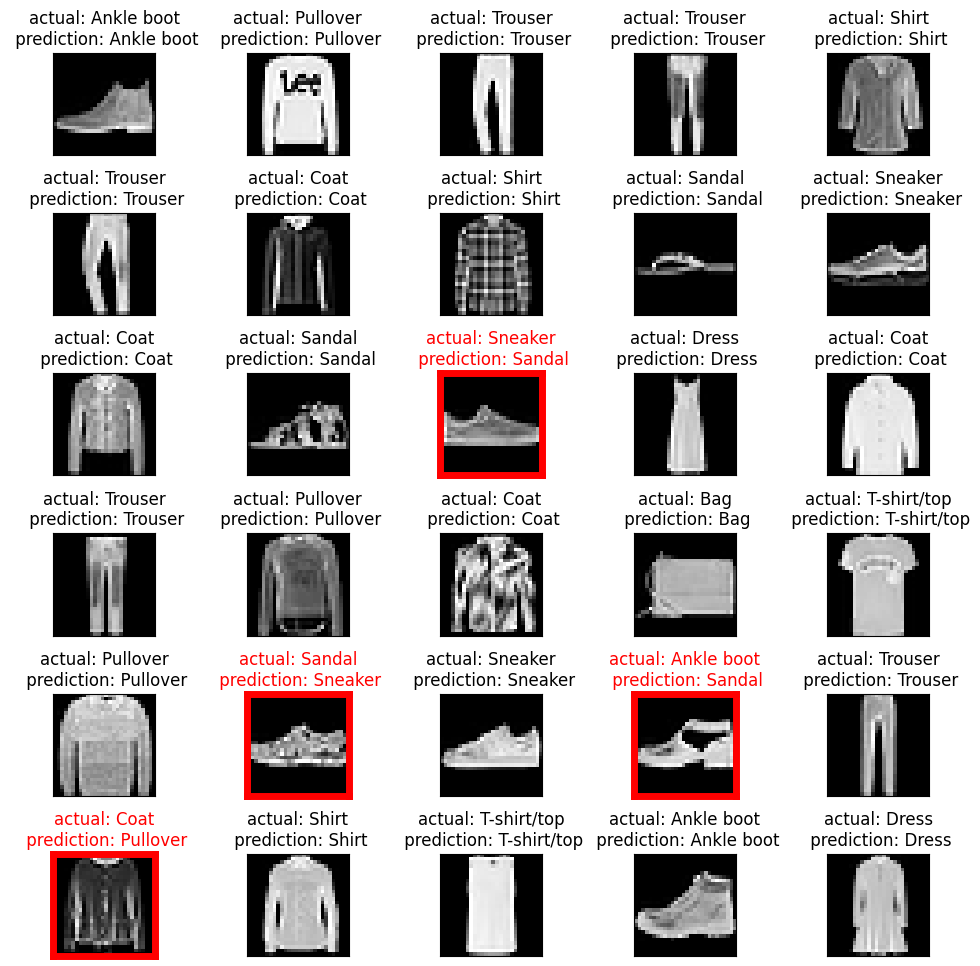

In [30]:
#showing predictions vs actual
plot_images(30,test_images[:30],True,y_pred[:30])

In [41]:
confusion_mtrx = confusion_matrix(y_true=test_labels, y_pred=y_pred)

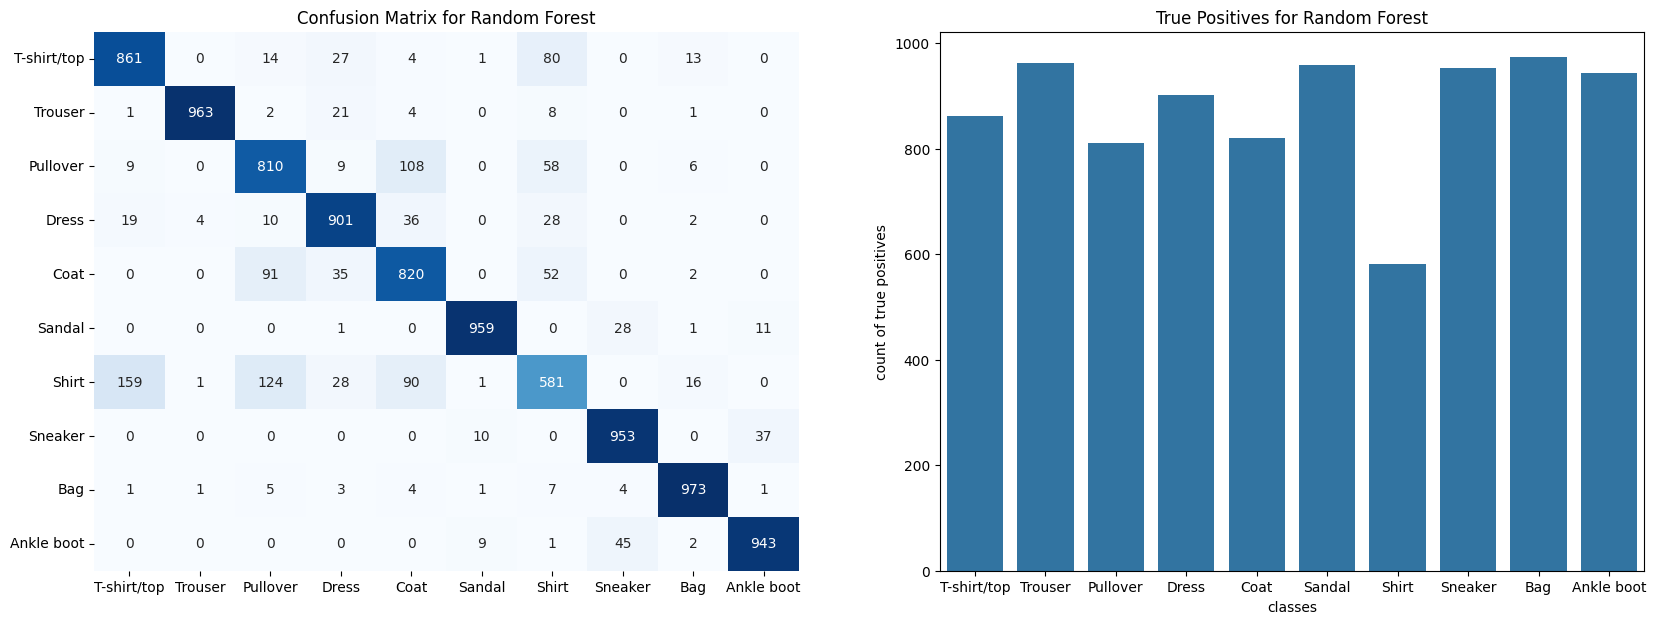

In [40]:
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.heatmap(confusion_mtrx,xticklabels=[value for value in classes.values()], yticklabels=[value for value in classes.values()],annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.subplot(1,2,2)
sns.barplot(x=[value for value in classes.values()], y=np.diag(confusion_mtrx))
plt.title('True Positives for Random Forest')
plt.ylabel('count of true positives')
plt.xlabel('classes')
plt.show()

In [44]:
conf_matrix = pd.DataFrame(confusion_mtrx)
conf_matrix.columns = [value for value in classes.values()]
conf_matrix.to_csv('CM_RF.csv')